## `Simple Linear Regression ( Manually )`

In [94]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#### Load dataset

In [95]:
data = pd.read_excel("Folds5x2_pp.xlsx")

In [96]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


#### Check the correlation

In [97]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


##### PE and AT are highly correlated `( We will take only one variable because it's Simple Linear Regression )`

#### Plot the jointplot for both variables

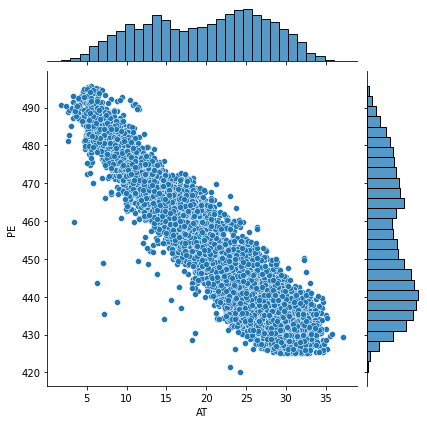

In [98]:
sns.jointplot(data["AT"],data["PE"])

In [99]:
data[["AT","PE"]]

,AT,PE
0,14.96,463.26
1,25.18,444.37
2,5.11,488.56
3,20.86,446.48
4,10.82,473.90
...,...,...
9563,16.65,460.03
9564,13.19,469.62
9565,31.32,429.57
9566,24.48,435.74


In [100]:
x = data["AT"]
y = data["PE"]

## `Calculations` :

![](https://miro.medium.com/max/1400/1*naUl1ECEcrGL_y32X7kG8Q.png)

#### Theta 1 is slope (m) :

In [101]:
theta1 = (((x-x.mean()) * (y-y.mean())).sum() / ((x-x.mean()) **2).sum())
print(f"Value of Theta1 = {theta1}")

Value of Theta1 = -2.171319958517793


#### Theta 0 is intercecept (b) :

In [102]:
theta0 = y.mean() - (theta1 * x.mean())
print(f"Value of Theta0 = {theta0}")

Value of Theta0 = 497.0341198927677


#### Predicted a single value of AT

In [103]:
# y_pred = 497.03411 - 2.171319958517793 * AT
y_pred = 497.03411 - 2.171319958517793 * (14.96)
print(f"Predicted value for a single value of AT = {y_pred}")

Predicted value for a single value of AT = 464.5511634205738


#### Error

In [104]:
e1 = 463.26 - 464.5511634205738 # actual - predicted 
e1

-1.2911634205738096

#### Predicted for the whole x

In [105]:
temp = data[["AT","PE"]]
# prediction for all datapoint
y_pred = 497.03411 - 2.171319958517793 * x
temp["predicted"] = y_pred

#### Observed vs Predicted

In [106]:
temp

,AT,PE,predicted
0,14.96,463.26,464.551163
1,25.18,444.37,442.360273
2,5.11,488.56,485.938665
3,20.86,446.48,451.740376
4,10.82,473.90,473.540428
...,...,...,...
9563,16.65,460.03,460.881633
9564,13.19,469.62,468.394400
9565,31.32,429.57,429.028369
9566,24.48,435.74,443.880197


#### SSE (sum of square error)

In [107]:
SSE = ((temp["PE"] - temp["predicted"])**2).sum()
print(f"Sum of squared error = {SSE}")

Sum of squared error = 281602.5248430792


#### Plot the regression line

Text(2, 480, '497.03411 - 2.171319958517793 * AT')

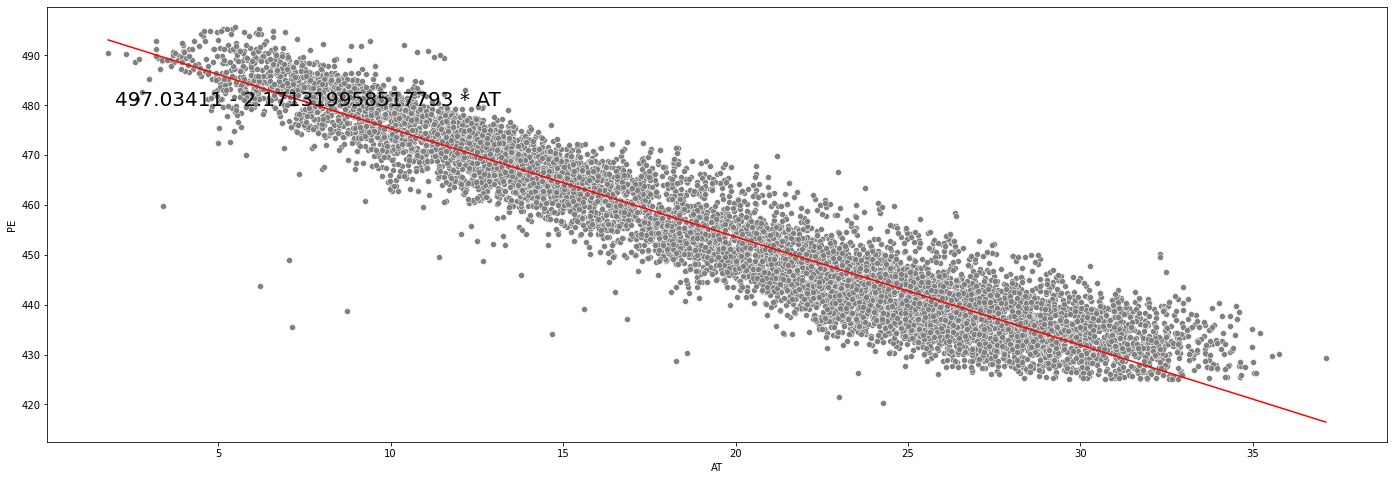

In [117]:
plt.figure(figsize=(24,8))
sns.scatterplot(data["AT"],data["PE"],color="grey")
sns.lineplot(x=temp["AT"],y=temp["predicted"],color="red")
plt.annotate("497.03411 - 2.171319958517793 * AT",(2,480),size=20,color="black")

#### Regression line vs Mean line

In [109]:
### when independent variable do not exist
y_pred = y.mean()
temp["predicted_when_x_is_not_there"] = y_pred

In [110]:
temp

,AT,PE,predicted,predicted_when_x_is_not_there
0,14.96,463.26,464.551163,454.365009
1,25.18,444.37,442.360273,454.365009
2,5.11,488.56,485.938665,454.365009
3,20.86,446.48,451.740376,454.365009
4,10.82,473.90,473.540428,454.365009
...,...,...,...,...
9563,16.65,460.03,460.881633,454.365009
9564,13.19,469.62,468.394400,454.365009
9565,31.32,429.57,429.028369,454.365009
9566,24.48,435.74,443.880197,454.365009


<AxesSubplot:xlabel='AT', ylabel='PE'>

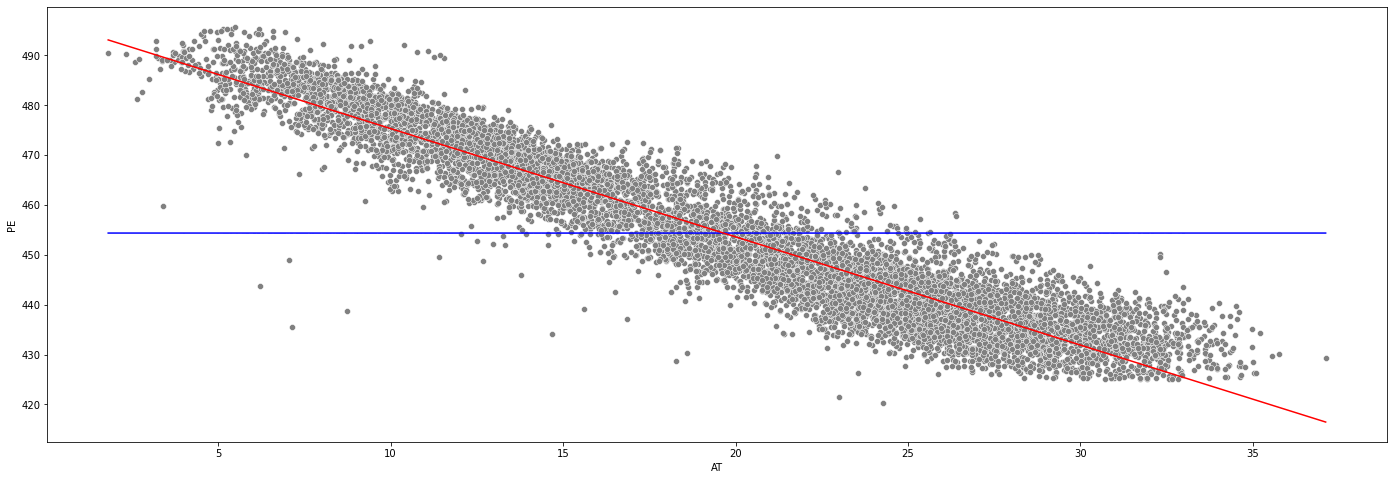

In [111]:
plt.figure(figsize=(24,8))
sns.scatterplot(data["AT"],data["PE"],color="grey")
sns.lineplot(x=temp["AT"],y=temp["predicted_when_x_is_not_there"],color="blue")
sns.lineplot(x=temp["AT"],y=temp["predicted"],color="red")

### `Calculations of SST, SSE and SRR`

In [112]:
SST = ((y - y.mean()) ** 2) . sum()
SST

2786697.939399154

#### where independent variable do not exits SST = SSE

In [113]:
SSR = SST - SSE
SSR

2505095.414556075

#### In regression sum of square (SSR) regression is 2505095.414556075

In [118]:
print(f'Regression decreased error by :{SSR}')
print(f'Error decreased by:{SST - SSE}')
print(f'Error when no independent variable exist:{SST}')
print(f'Error when independent variable exist:{SSE}')

Regression decreased error by :2505095.414556075
Error decreased by:2505095.414556075
Error when no independent variable exist:2786697.939399154
Error when independent variable exist:281602.5248430792


#### `Hence Regression Proved to be a good method by reducing residuals / error to a great extent`